Understanding your priors
=====================

Bagpipes allows you to set priors on your individual fit parameters, but how do these translate into priors on things like star-formation rates or mass-weighted ages? Bagpipes also provides functionality to allow you to draw models directly from your prior distributions, in order to fully understand the prior assumptions you are making. 

This currently only works for star-formation history properties, rather than spectral ones like colours and emission line strengths, but the extension to spectral properties is fairly simple, so if you need it just ask.

For example, let's take the simple fit instructions dictionary from Example 3 and see what priors we're imposing. We can fix the mass and redshift to get a better idea of priors like the specific star-formation rate.

In [1]:
import numpy as np 
import bagpipes as pipes

exp = {}                          # Tau-model star-formation history component
exp["age"] = (0.1, 15.)           # Vary age between 100 Myr and 15 Gyr, in practice 
                                  # the code automatically limits this to the age of
                                  # the Universe at the observed redshift.

exp["tau"] = (0.3, 10.)           # Vary tau between 300 Myr and 10 Gyr
exp["massformed"] = 10.           # Fix the mass formed at 10^10 Solar masses
exp["metallicity"] = (0., 2.5)    # vary Z between 0 and 2.5 Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)             # Vary Av between 0 and 2 magnitudes

fit_info = {}                     # The fit instructions dictionary
fit_info["redshift"] = 0.5        # Fix the redshift to 0.5
fit_info["exponential"] = exp   
fit_info["dust"] = dust

priors = pipes.check_prior(fit_info, n_draws=10000)

Now the prior dictionary within the priors object contains information on the priors being imposed:

In [2]:
print list(priors.prior)

['exponential:tau', 'exponential:age', 'sfr', 'dust:Av', 'mwa', 'mass', 'sfh', 'exponential:metallicity', 'ssfr']


We can make a quick plot of our priors as follows.

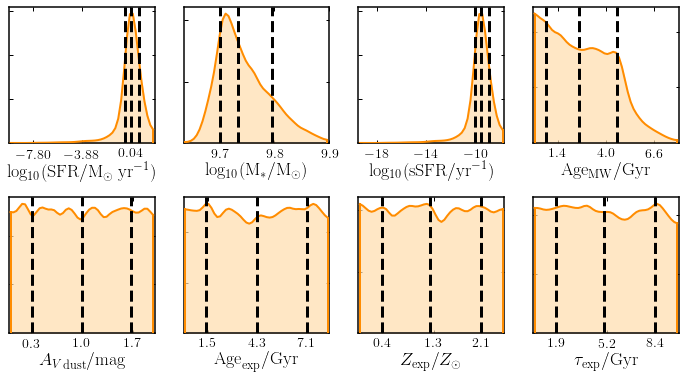

In [3]:
fig = pipes.plotting.plot_1d_distributions(priors, save=False)